# Data scraping from public selection results - Petrobras 2022

### Importing modules

In [2]:
import os
from PyPDF2 import PdfFileReader, PdfFileWriter
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting basic information from the pdf file avaliable

In [3]:
pdf_path = 'ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF'

with open(pdf_path, 'rb') as f:
    pdf = PdfFileReader(f)
    information = pdf.getDocumentInfo()
    number_of_pages = pdf.getNumPages()

txt = f"""
Information about {pdf_path}: 

Author: {information.author}
Creator: {information.creator}
Producer: {information.producer}
Subject: {information.subject}
Title: {information.title}
Number of pages: {number_of_pages}
"""

print(txt)


Information about ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF: 

Author: Crisana de Souza Correia
Creator: Microsoft® Word 2016
Producer: Microsoft® Word 2016
Subject: None
Title: None
Number of pages: 541



### Ansembling pages of interesst (relative to data science enphasys)

In [4]:
 def split(path, name_of_split,range_pdf):
    
    pdf = PdfFileReader(path)
    pdf_writer = PdfFileWriter()

    for page in range_pdf:

        pdf_writer.addPage(pdf.getPage(page))

        output = f'{name_of_split}.pdf'

    with open(output, 'wb') as output_pdf:
        pdf_writer.write(output_pdf)


In [5]:
path = 'ED_8_PETROBRAS_PSP1_2021_RES_FINAL_OBJ_CONV_TITULOS.PDF'
name_of_split = 'Enfase DS'
range_pdf = range(119,143)

split(path, name_of_split,range_pdf)


### Extracting text from the new pdf file and adding it to a list os strings

In [6]:
pdfFileObj = open('Enfase DS.PDF','rb')
pdfReader = PdfFileReader(pdfFileObj)

num_pages = pdfReader.numPages
count = 0
text = ""

In [7]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
print(text[0:300])

120
 
 
10093806, Abraao Lucas Pereira de Andrade, 16.00, 32, 32.00, 51, 10.00, 9.00, 13.00, 48.00 / 10203083, Abrahao do Nascimento 
Guimaraes, 25.00, 37, 27.00, 46, 12.00, 5.00, 10.00, 52.00 / 10080752, Abrhaao Ribeiro, 26.00, 38, 32.00, 51, 14.00, 9.00, 9.
00, 
58
.00 / 10061411, Adailton Almeida


In [8]:
text =  text.replace('\n','')[1:] # getting rid of spaces
linhas = text.split('1.1.7.1')[0] # delimiter that indicates the beginning of the following section
linhas = linhas.split('/')[1:]    # spliting information of each candidate

linhas[0:5]

[' 10203083, Abrahao do Nascimento Guimaraes, 25.00, 37, 27.00, 46, 12.00, 5.00, 10.00, 52.00 ',
 ' 10080752, Abrhaao Ribeiro, 26.00, 38, 32.00, 51, 14.00, 9.00, 9.00, 58.00 ',
 ' 10061411, Adailton Almeida Oliveira Junior, 30.00, 36, 21.00, 26, 10.00, 6.00, 5.00, 51.00 ',
 ' 10062454, Adben Jomil Trevizoli de Carvalho, 25.00, 36, 24.00, 39, 9.00, 12.00, 3.00, 49.00 ',
 ' 10191929, Adelmo Rodrigues de Barros Junior, 14.00, 32, 28.00, 48, 16.00, 11.00, 1.00, 42.00 ']

### Bilding a dataframe from the garthered data

In [9]:
# defining headers directly from document text

exp = 'número de inscrição, nome do candidato em ordem alfabética, nota final na prova objetiva de conhecimentos básicos (P1), número de acertos na prova objetiva de conhecimentos básicos (P1), nota final na prova objetiva de conhecimentos específicos (P2), número de acertos na prova objetiva de conhecimentos específicos (P2), nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2), nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2), nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2) e nota final nas provas objetivas'
headers = exp.replace(' e nota',',').split(', ')
headers

['número de inscrição',
 'nome do candidato em ordem alfabética',
 'nota final na prova objetiva de conhecimentos básicos (P1)',
 'número de acertos na prova objetiva de conhecimentos básicos (P1)',
 'nota final na prova objetiva de conhecimentos específicos (P2)',
 'número de acertos na prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2)',
 'nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2)',
 'final nas provas objetivas']

In [10]:
import pandas as pd
import numpy as np

# funtion that either converts a value into floar or returns a null value
def to_float(a):
    try:
        return float(a)
    except:
        return np.nan

# Declearing inital dataframe whith all the data in a single column
df = pd.DataFrame(linhas,columns = ['InitialString'])   

# Extracting data from each part of the initial string
for i in range(len(headers)):
    df[headers[i]] = df['InitialString'].apply(lambda x: x.split(',')[i])

# Converting all values after candidate name to numerics
for i in range(len(headers)):
    if i > 1:
        df[headers[i]] = df[headers[i]].apply(lambda x : to_float(x)) 

df.head()

,InitialString,número de inscrição,nome do candidato em ordem alfabética,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova objetiva de conhecimentos específicos (P2),número de acertos na prova objetiva de conhecimentos específicos (P2),nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2),final nas provas objetivas
0,"10203083, Abrahao do Nascimento Guimaraes, 25...",10203083,Abrahao do Nascimento Guimaraes,25.0,37.0,27.0,46.0,12.0,5.0,10.0,52.0
1,"10080752, Abrhaao Ribeiro, 26.00, 38, 32.00, ...",10080752,Abrhaao Ribeiro,26.0,38.0,32.0,51.0,14.0,9.0,9.0,58.0
2,"10061411, Adailton Almeida Oliveira Junior, 3...",10061411,Adailton Almeida Oliveira Junior,30.0,36.0,21.0,26.0,10.0,6.0,5.0,51.0
3,"10062454, Adben Jomil Trevizoli de Carvalho, ...",10062454,Adben Jomil Trevizoli de Carvalho,25.0,36.0,24.0,39.0,9.0,12.0,3.0,49.0
4,"10191929, Adelmo Rodrigues de Barros Junior, ...",10191929,Adelmo Rodrigues de Barros Junior,14.0,32.0,28.0,48.0,16.0,11.0,1.0,42.0


### Basic initial analysis

In [11]:
df.describe()


,nota final na prova objetiva de conhecimentos básicos (P1),número de acertos na prova objetiva de conhecimentos básicos (P1),nota final na prova objetiva de conhecimentos específicos (P2),número de acertos na prova objetiva de conhecimentos específicos (P2),nota final no bloco 1 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 2 da prova objetiva de conhecimentos específicos (P2),nota final no bloco 3 da prova objetiva de conhecimentos específicos (P2),final nas provas objetivas
count,1618.000000,1619.000000,1620.000000,1619.000000,1619.000000,1619.000000,1618.000000,1614.000000
mean,25.495056,35.960469,28.731481,42.988264,13.885114,7.811612,7.032756,54.214374
std,6.885245,4.667926,6.241495,6.443382,3.800708,3.290202,3.591826,10.703228
min,10.000000,16.000000,21.000000,24.000000,2.000000,-3.000000,-3.000000,36.000000
25%,20.000000,33.000000,24.000000,38.000000,11.000000,5.000000,5.000000,46.000000
50%,26.000000,36.000000,27.000000,43.000000,14.000000,8.000000,7.000000,53.000000
75%,30.000000,39.000000,32.000000,48.000000,16.000000,10.000000,9.000000,61.000000
max,46.000000,48.000000,54.000000,62.000000,26.000000,17.000000,19.000000,93.000000


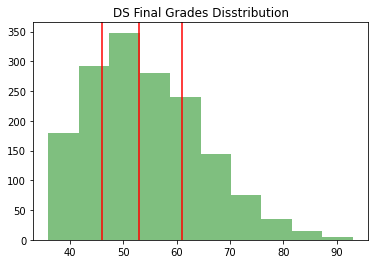

In [12]:
plt.figure()
plt.hist(df['final nas provas objetivas'],bins = 10 , color = 'green',alpha = 0.5)
plt.title('DS Final Grades Disstribution')

for q in [0.25,0.50,0.75]:
    
    plt.axvline(df['final nas provas objetivas'].quantile(q),c = 'red')
